In [223]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as snb; snb.set()

In [230]:
x_tra=pd.read_csv("C:/Users/javie/OneDrive/Documentos/CIMAT/Ciencia de datos/Tarea 6/Ejercicio 3/bow_train.csv")
x_te=pd.read_csv("C:/Users/javie/OneDrive/Documentos/CIMAT/Ciencia de datos/Tarea 6/Ejercicio 3/bow_test.csv")
label_train=pd.read_csv("C:/Users/javie/OneDrive/Documentos/CIMAT/Ciencia de datos/Tarea 6/Ejercicio 3/labels_train.csv")
label_test=pd.read_csv("C:/Users/javie/OneDrive/Documentos/CIMAT/Ciencia de datos/Tarea 6/Ejercicio 3/labels_test.csv")
categorias=['Lavadoras','Peliculas','Hoteles', 'Ordenadores', 'Coches','Moviles','Musica','Libros']
for i in range(len(categorias)):
    label_train.loc[(label_train.categoria == i+1),'categoria']=categorias[i]
    label_test.loc[(label_test.categoria == i+1),'categoria']=categorias[i]
sentimientos=["Negativa","Positiva"]
for i in range(len(sentimientos)):
    label_train.loc[(label_train.sentimiento == i),'sentimiento']=sentimientos[i]
    label_test.loc[(label_test.sentimiento == i),'sentimiento']=sentimientos[i]
y_train_sen=label_train["sentimiento"].values
y_train=label_train["categoria"].values
y_test=label_test["categoria"].values
y_test_sen=label_test["sentimiento"].values

# categoria=pd.Series(y_train)
# sentimiento=pd.Series(y_train_sen)
# df=pd.concat([x_tra, categoria, sentimiento], axis=1)
# df.rename(columns={0:'Categoria', 1:'Sentimiento'}, inplace=True)

# sentimiento=pd.Series(np.append(y_train_sen,y_test_sen))
# aux=pd.concat([x_tra, x_te],ignore_index=True).drop("Unnamed: 0",axis=1)
# df=pd.concat([aux, categoria, sentimiento], axis=1)
# df.rename(columns={0:'Categoria', 1:'Sentimiento'}, inplace=True)

##Stuff
# train=df.sample(n=320)
# test=df.iloc[list(set(np.arange(320))-set(train.index))]
# x_tra=train.iloc[:,0:100]
# y_train=train["Categoria"]
# y_train_sen=test["Sentimiento"]
# x_te=test.iloc[:,0:100]
# y_test=test["Categoria"]
# y_test_sen=test["Sentimiento"]


In [241]:
def plot_reviews(X_transformed,label,no_plot):
    num_classes=len(set(label))
    titulo=["ISOMAP","Locally Linear Embedding","Locally Linear Embedding","Espectral Embedding","t-SNE"]
    names=["ISOMAP","lle","lle1","espectral","t-SNE"]
    palette = np.array(snb.color_palette("hls", num_classes))
    d = {"x": X_transformed[:,0], 'y':X_transformed[:,1], "Categoría": label}
    df = pd.DataFrame(data=d)
    g = snb.FacetGrid(df, hue="Categoría", palette=palette, height=10,aspect=.95)
    g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5)
    g.add_legend(fontsize="x-large");
    #plt.title(titulo[no_plot],fontsize=25)
    plt.xlabel("",fontsize=20)
    plt.ylabel("",fontsize=20)
    plt.title(titulo[no_plot],fontsize=25)
    #plt.savefig("./plots/Reviews_categories"+names[no_plot]+".png",bbox_inches="tight")

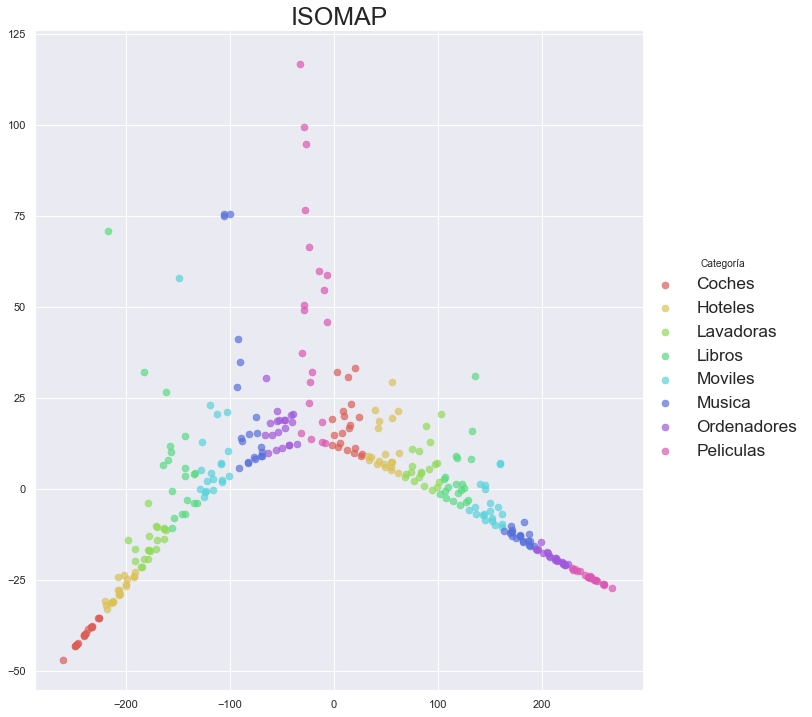

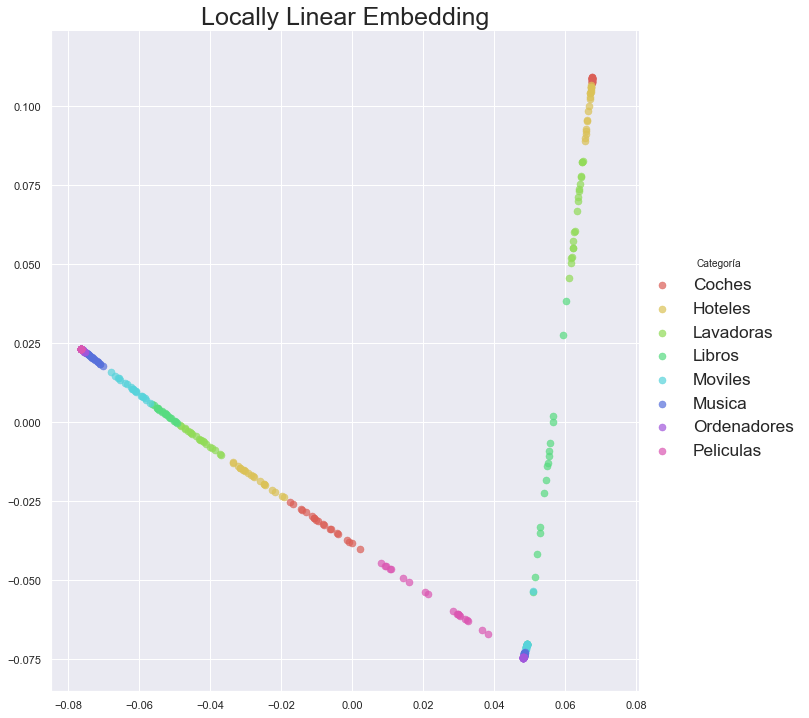

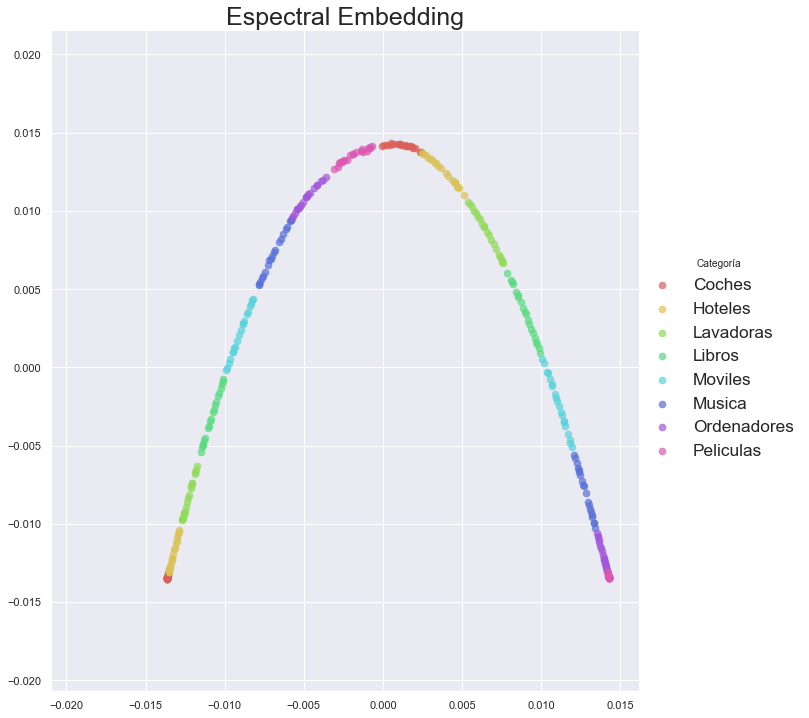

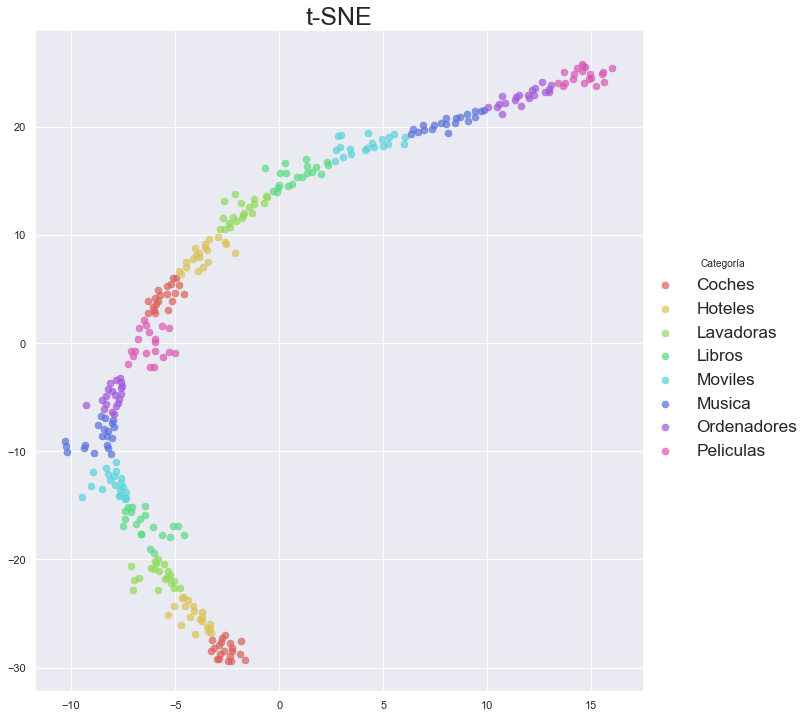

In [243]:
def make_analysis(x_tra,y_train):
    
    #Compute and plot ISOMAP
    from sklearn.manifold import Isomap
    embedding = Isomap(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_reviews(X_transformed,y_train,0)
    
    #Compute and plot Locally linear embaddings
    from sklearn.manifold import LocallyLinearEmbedding
    embedding = LocallyLinearEmbedding(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_reviews(X_transformed,y_train,1)
    
    #plot Spectral Embedding
    from sklearn.manifold import SpectralEmbedding
    embedding = SpectralEmbedding(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_reviews(X_transformed,y_train,3)
    
    #plot t-SNE
    from sklearn.manifold import TSNE
    embedding = TSNE(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_reviews(X_transformed,y_train,4)
    return X_transformed

X_transformed=make_analysis(x_tra,y_train)

# Training a regressor

array([[ 2.81822624e+01, -2.87630367e+00],
       [ 2.80114117e+01, -2.67528725e+00],
       [ 2.84830036e+01, -3.51971388e+00],
       [ 2.76782856e+01, -2.51483440e+00],
       [ 2.80177422e+01, -3.22613645e+00],
       [ 2.76232014e+01, -2.83940983e+00],
       [ 2.78902035e+01, -3.69864821e+00],
       [ 2.73211727e+01, -2.76622820e+00],
       [ 2.74956131e+01, -3.44454908e+00],
       [ 2.72375851e+01, -3.20182228e+00],
       [ 2.72730827e+01, -3.58589268e+00],
       [ 2.68661900e+01, -2.73915863e+00],
       [ 2.67232456e+01, -2.98769832e+00],
       [ 2.67028694e+01, -3.33144641e+00],
       [ 2.68424282e+01, -3.85832214e+00],
       [ 2.65385380e+01, -3.57497978e+00],
       [ 2.70355968e+01, -4.36635780e+00],
       [ 2.60686398e+01, -3.33930373e+00],
       [ 2.62184887e+01, -3.87493420e+00],
       [ 2.60717735e+01, -4.12814093e+00],
       [ 2.55967846e+01, -3.65070486e+00],
       [ 2.51300983e+01, -3.05044031e+00],
       [ 2.53000469e+01, -3.72696257e+00],
       [ 2.

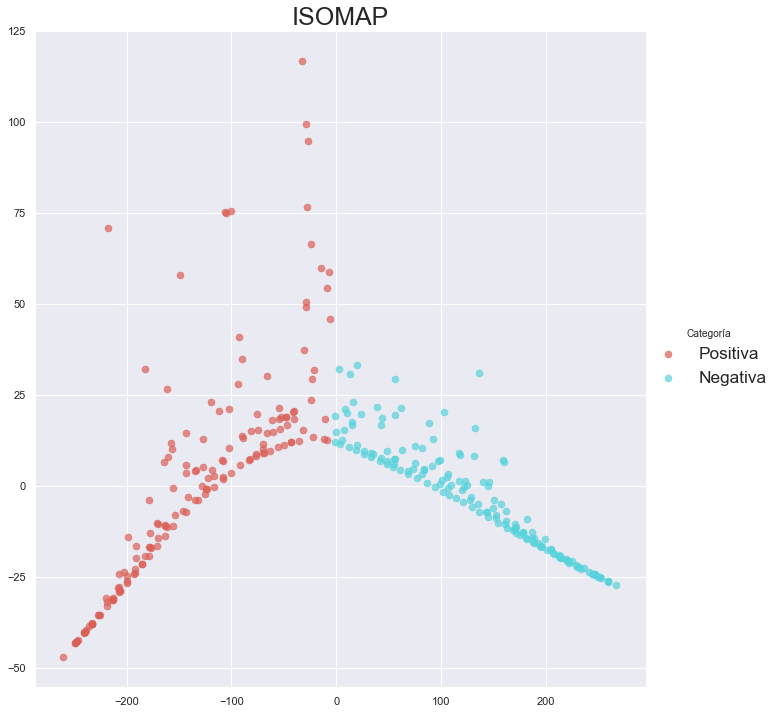

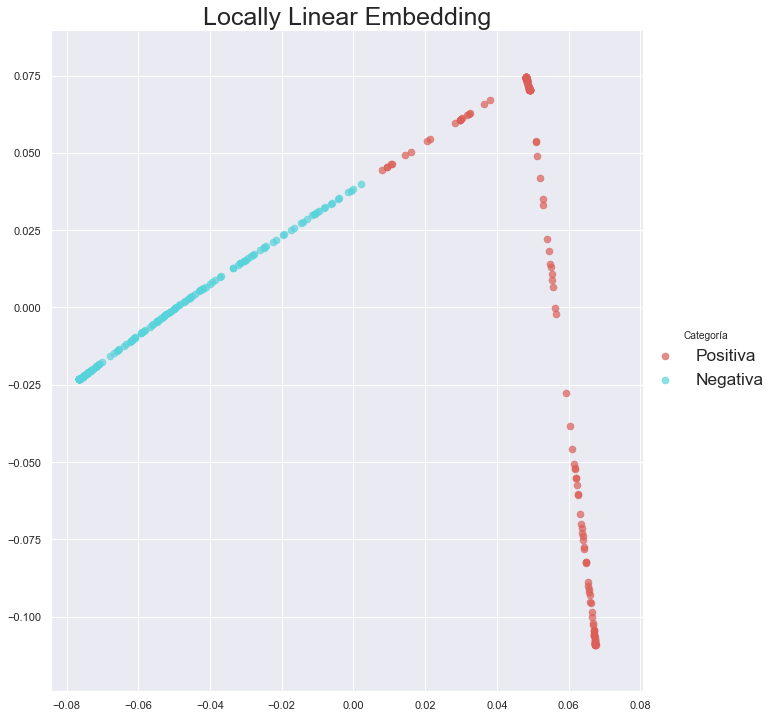

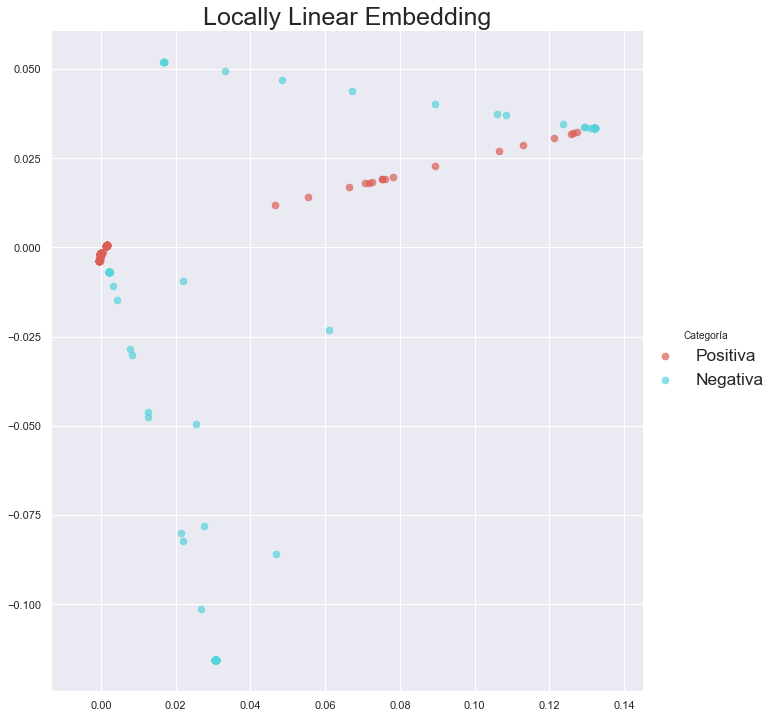

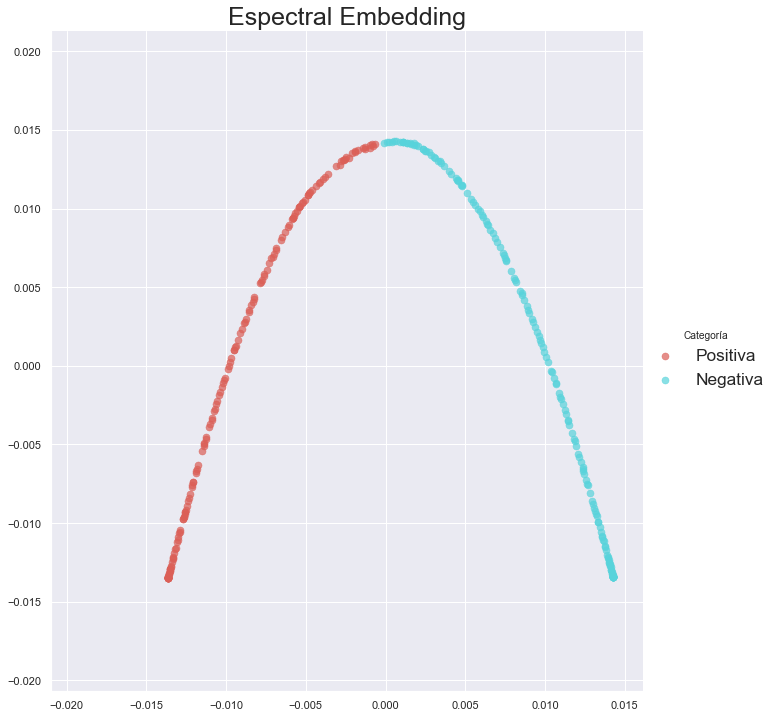

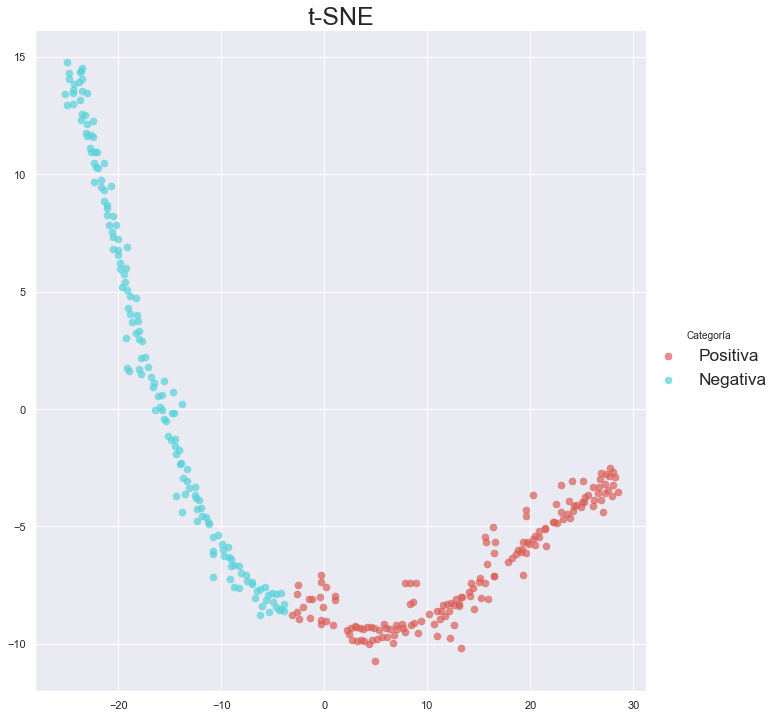

In [235]:
a=make_analysis(x_tra,y_train_sen)

In [237]:
# make_analysis(x_te,y_test)